In [1]:

decode32(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode64(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))


float32 = decode32(Float32(1/3))
println(float32)

float64=decode64(Float64(1/3))
println(float64)

float32to64 = decode64(Float64(Float32(1/3)))
println(float32to64)



('0', "01111101", "01010101010101010101011")
('0', "01111111101", "0101010101010101010101010101010101010101010101010101")
('0', "01111111101", "0101010101010101010101100000000000000000000000000000")


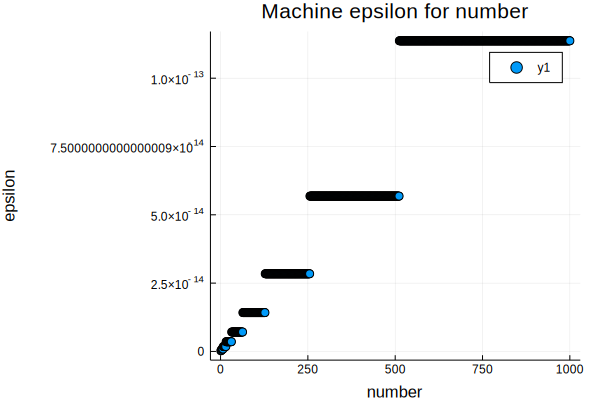

In [52]:
using Plots
t = collect(1.0:1000.0)
distances=map(x->eps(x),t)
scatter(1:1:1000,distances,title="Machine epsilon for number",xlabel="number",ylabel="epsilon")

In [3]:
using Printf

function eto(x)
    e=0.0
    for n in 0:1:20
        tmp =x^n/(factorial(n))
        println(tmp)
        e+=tmp
    end
    return e
end


println("Dokladny wynik: e^-5.5 = 0.0040867714384640669934647026847207684083906566509381\n")
println("Algorym niestabilny numerycznie: ")

e = eto(-5.5);
@printf "e^-5.5 = %f \n" e

println()

println("Algorym stabilny numerycznie: ")

e = 1/eto(5.5);
@printf "e^-5.5 = %f \n" e


println("Niedokladnosc wyniku algorytmu niestabilnego bierze sie z tego, ze na przemian dodajemy i odejmujemy liczby. \nPrzez to wzmacniany jest blad reprezentacji. W algorytmie stabilnym nie wystepuje odejmowanie. Wiec wynik jest dokladniejszy.")




Dokladny wynik: e^-5.5 = 0.0040867714384640669934647026847207684083906566509381

Algorym niestabilny numerycznie: 
1.0
-5.5
15.125
-27.729166666666668
38.127604166666664
-41.940364583333334
38.44533420138889
-30.20704830109127
20.76734570700025
-12.691155709833485
6.980135640408417
-3.4900678202042084
1.5996144175935956
-0.6767599459049827
0.2658699787483861
-0.09748565887440823
0.03351069523807783
-0.01084169551820165
0.0033127402972282817
-0.0009589511386713448
0.00026371156313461985
e^-5.5 = 0.004142 

Algorym stabilny numerycznie: 
1.0
5.5
15.125
27.729166666666668
38.127604166666664
41.940364583333334
38.44533420138889
30.20704830109127
20.76734570700025
12.691155709833485
6.980135640408417
3.4900678202042084
1.5996144175935956
0.6767599459049827
0.2658699787483861
0.09748565887440823
0.03351069523807783
0.01084169551820165
0.0033127402972282817
0.0009589511386713448
0.00026371156313461985
e^-5.5 = 0.004087 
Niedokladnosc wyniku algorytmu niestabilnego bierze sie z tego, ze na prz